**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [292]:

#importing relevant packages
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display, Math
import math as math
import warnings
import ExamProject
warnings.filterwarnings("ignore")
from mpl_toolkits import mplot3d


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

To verify that optimal labor supply is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, we use SymPy to construct $V(w,\tau,G)$, differentiate this expression with respect to \tilde{w} and solve it to yield 2 solutions.

In [293]:
as1 = ExamProject.Assignment1()

as1.as1_1()

L_star:


<IPython.core.display.Math object>

Where only the positive solution is valid, as labor supply is always non-negative. This result is equivalent to the given $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$.


***

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

We use the expression from Q1 and insert $(1-\tau)w$ for $\tilde{w}$, and lambdify the function. We then define a range of 1000 w-values from 0 to 50, calculate the optimal labour supply for each w, and plot the function:

<IPython.core.display.Math object>

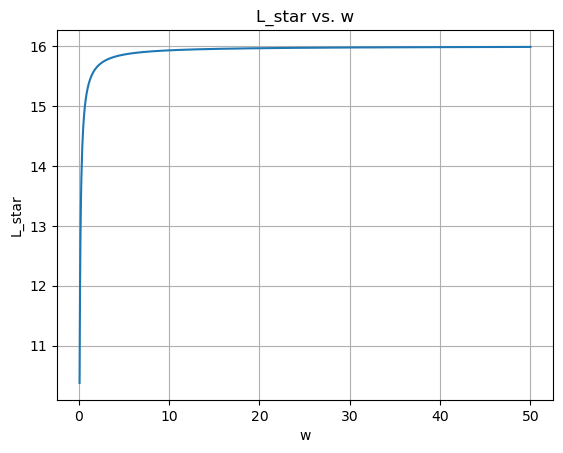

In [294]:
as1.as1_2()

As is illustrated above, the optimal labor hour count is at most 16 given any w, meaning that when the number of labor hours exceed 16 people do not get extra utility from working, and would rather have leisure time. The graph having some asymptote is due to logarithimic nature of the utility function.

***


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


We begin by substituting the given G into the utility function, and do the same procedure as in Q1. From there, we define meshgrid of $\tau$ and L-values, and compute the utility for each point. This is then plotted. 

<IPython.core.display.Math object>

Utility:


<IPython.core.display.Math object>

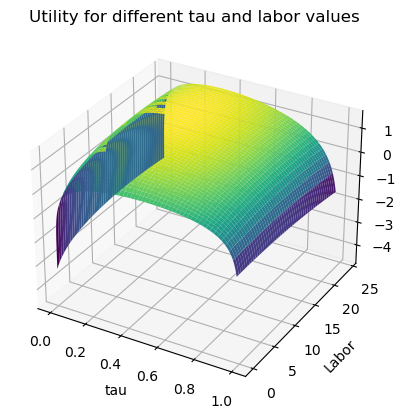

In [295]:
as1.as1_3()

As the inner part of the utility function looks like a classic Cobb-Douglas function, it makes sense that a combination of private and public/government consumption gives the highest utility and that the utility is negatively affected by only consuming one or the other, thus the highest utility is acquired by mixing consumption.  

***

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

From the utility-function in Q3, we insert $L^*(w)$, and maximize with respect to $\tau$ (note that we technically minimize the negative utility function)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

optimal tau: 0.33814453125000005


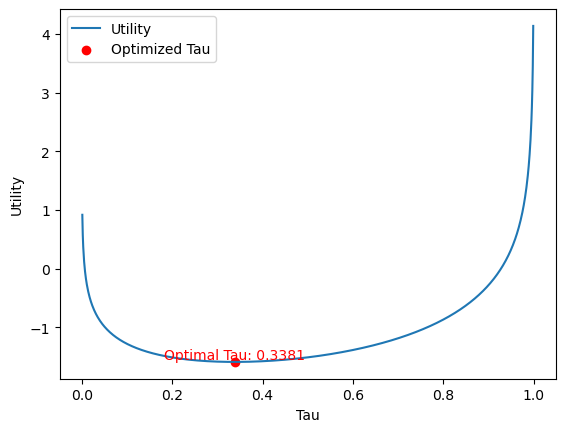

In [296]:
as1.as1_4()

From here we observe that the tax-rate that maximizes worker utility is $\tau=0.3381$, which is thus the socially optimal tax-rate.

***

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We were unable to solve the worker problem analytically, and have thus approached the problem numerically. This is done by first constructing a worker utility objective function for a given G and $\tau$, and maximizing this. This whole optimization is then nested in another objective function, that minimizes the equation $$|G-\tau w L^*|$$

This outer optimization will then yield our G-values for the different sets of parameters:

In [297]:
as1.as1_5()

Optimal G for rho = 1.001 and sigma = 1.001: 5.154307929932577
Optimal G for rho = 1.5 and sigma = 1.5: 3.5263865078158325


Thus the optimal G for the first set of parameters is 5.2, and for the second set, 3.52. That is, when $\rho$ and $\sigma$ are larger, the optimal amount of public spending will be lower. 

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

This question further nests the optimization function of Q5, solving for the optimal $\tau$.

In [298]:
as1.as1_6()
as1.as1_6_2()

Optimal tau for sigma = rho = 1.001: 0.5562583069253533
Optimal tau for sigma = rho = 1.5: 0.4357170167504283


Here we can see, that when $\rho$ and $\sigma$ are larger, the socially optimal tax-rate $\tau$ are lower. This corresponds to the lower optimal government spending levels we found in Q5. 

***

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In this question, we will assume that you may hire a fraction of a hairdresser if you wish. Thus we do not round to any natural number in our results. Below we maximize the profits for $\kappa \in \{1.0,2.0\}$ 

In [299]:
#Baseline parameters
eta = 0.5
w = 1
#for kappa = 1.0
def obj1(l):
    k=1
    y=l
    p=k*y**(-eta)
    pi_t = p*y-w*l
    return -pi_t
#for kappa = 2.0
def obj2(l):
    k=2
    y=l
    p=k*y**(-eta)
    pi_t = p*y-w*l
    return -pi_t

#We maximize the objective functions, given different kappa
result1 = optimize.minimize(obj1,1,constraints={'type': 'ineq', 'fun': lambda l: l})
result2 = optimize.minimize(obj2,1,constraints={'type': 'ineq', 'fun': lambda l: l}) 
print(f'For kappa = 1.0, optimal l is: {result1.x[0]}, with profit: {-result1.fun}')
print(f'For kappa = 2.0, optimal l is: {result2.x[0]}, with profit: {-result2.fun}')




For kappa = 1.0, optimal l is: 0.2500433634654149, with profit: 0.24999999811977291
For kappa = 2.0, optimal l is: 1.0, with profit: 1.0


For $\kappa$ = 1.0, $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}=\ell_{t}=\left(\frac{(1-0.5)1}{1}\right)^{\frac{1}{0.5}} = 0.5^2 = 0.25$ maximises profits, $\Pi_t = \kappa_t \ell_t^{1-\eta} - w \ell_t=1* 0.25^{1-0.5} - 1* 0.25 = 0.25$. 


For $\kappa$ = 2.0, $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}=\ell_{t}=\left(\frac{(1-0.5)2}{1}\right)^{\frac{1}{0.5}} = 1^2 = 1$ maximises profits, $\Pi_t = \kappa_t \ell_t^{1-\eta} - w \ell_t=2* 1^{1-0.5} - 1*1 = 1$. 

Which is the same (approximately) as what was found numerically. We have thus verified the equation for optimal labour numerically for $\kappa \in \{1.0, 2.0\}$

***

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

Below we derive H using K=1000 and shock series generated with np.random.seed(0).

In [300]:
# Initialize model. This model initializes all parameter values and shock series, calculates the ex_post_values, and holds all policies used in the Problem.
model = ExamProject.Assignment2()

# Calculate ex ante expected value of the salon. We use the policy "initialpolicy", which simply returns the optimal labour amount for each kappa.
ex_ante_value = np.mean([model.ex_post_value(model.shock_series[k], model.initialpolicy) for k in range(model.K)])

# Print the results
print("Ex ante expected value of the salon (H):", ex_ante_value)

Ex ante expected value of the salon (H): 27.81957901976801


Thus, we have found the expected value of the salon to be about 27.82 over its lifetime.

***

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We update the policy function to accomodate the new choice of $\ell$:

In [301]:
# Initialize model
model = ExamProject.Assignment2()
# Calculate ex ante expected value of the salon (Delta)
ex_ante_value = np.mean([model.ex_post_value(model.shock_series[k], model.deltapolicy) for k in range(model.K)])

# Print the results
print("Ex ante expected value of the salon (H):", ex_ante_value)

Ex ante expected value of the salon (H): 28.499127095632424


Thus we have found the new ex ante expected value to be 28.49, a slight improvement in profitability from the 27.82 in Question 2. This new policy does in fact improve profitability.

***

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In this question, we optimize the function with respect to the delta-parameter. We choose the Nelder-Mead method, as very small marginal changes in the delta parameter has no effect on the lifetime-value of the salon.

Ex ante expected value of the salon: 28.499127095632424, Delta=0.05


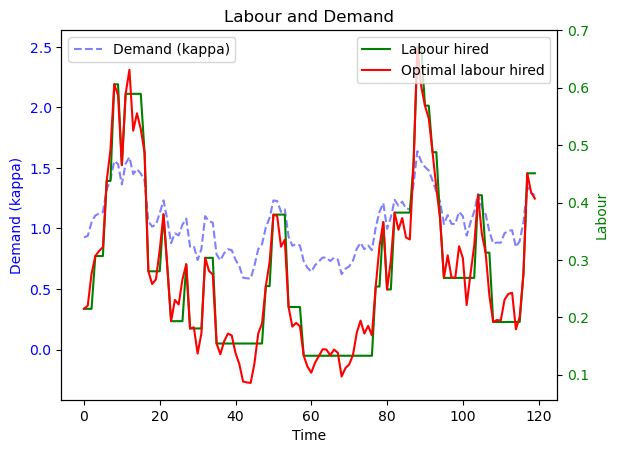

Optimal value of delta: [0.07789063], results in ex ante expected value of the salon (H) of 28.55871259527984


In [302]:
#Initialize model:
model = ExamProject.Assignment2()
# Calculate ex ante expected value of the salon
ex_ante_value = np.mean(
    [model.ex_post_value(model.shock_series[k], model.deltapolicy) for k in range(model.K)]
)
print(f"Ex ante expected value of the salon: {ex_ante_value}, Delta=0.05")
# Optimize for best Delta value:
result = optimize.minimize(model.obj_H,0.05,method='Nelder-Mead',bounds=[(0, None)])

# Plot the graph and print results
model.plot_graph()
print(f"Optimal value of delta: {result.x}, results in ex ante expected value of the salon (H) of {-result.fun}")

As seen above, we have found the optimal value of $\Delta$ to be about 0.078. With this value, we are somewhat unwilling to change the amount of labour we have hired from period to period, due to the $\iota$ variable. To illustrate this, we have plotted the development of demand, labour hired and the optimal labour amount from Question 1. It is easy to see the covariance between demand and optimal labour, and our modelling with $\Delta$ = 0.078 is a somewhat rigid form of the optimal labour amount, as expected.

***


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We can do slightly better than the delta approach, by using the expected profits of the next period. This is possible due to the AR(1) nature of the time-series, and the policy can be extended to multiple periods. That is, we have included in the considerations that the process is stationary around kappa $\approx$ 1, and that large deviations from this are often followed by regressions to the unconditional mean.

Ex ante expected value of the salon: 28.580906154435674


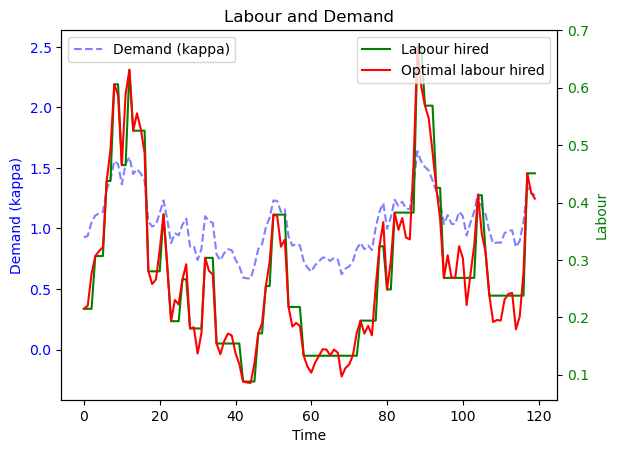

In [303]:

#Initialize model:
model = ExamProject.Assignment2()
# Calculate ex ante expected value of the salon
#Policy 1 is a function that additionally utilizes expected profits of the next period to determine if a recalibration is necessary. 
ex_ante_value = np.mean(
    [model.ex_post_value(model.shock_series[k], model.policy1) for k in range(model.K)]
)
print(f"Ex ante expected value of the salon: {ex_ante_value}")

# Plot the graph
model.plot_graph()

This yields a marginally better profitability of the salon, and we can see that the labor hired is somewhat closer to the optimal labor than in Q4.

***

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [304]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We have implemented the optimizer by following the pseudo code from the given algorithm, and this can be seen step by step in the .py file. Note that both ilutrations are not including the warmup face.

x_star = [-8.20164795e-09 -1.47839111e-08]


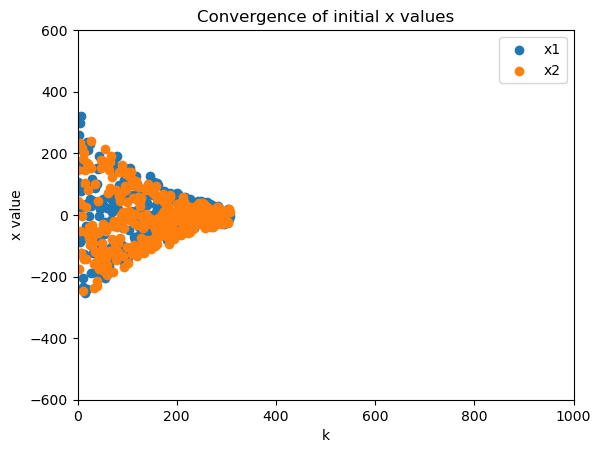

In [346]:

#call assignment 3
as3 = ExamProject.Assignment3()

#figure 1
as3.figure1()

From the ilustration of how the initial guess of x in period k varries with k, we can se that the more itterations is made the closer x gets to zero, so we can say that x converges. This is true for both x1 and x2 that x consists of. The way we have written the code gives us different starting values for x0 and x1 as these are set random, so this means thet the plot will look a lot different with different seeds but should converge never the less.

***

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

x_star = [-1.60267011e-09 -2.38931754e-09]


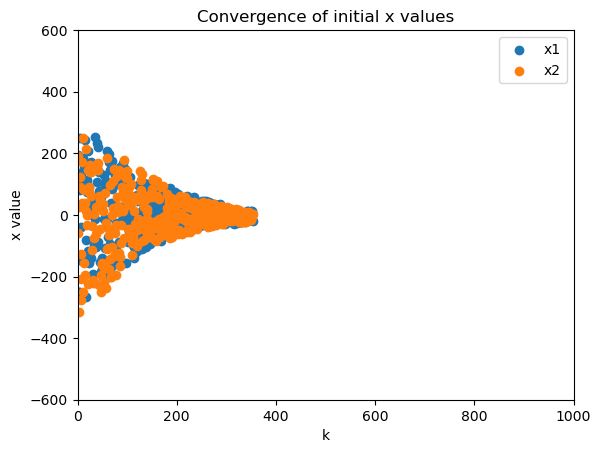

In [347]:
#call assignment 3
as3 = ExamProject.Assignment3()
# figure 2
as3.figure2()

When changing the number of warmup itterations from 10 to 100, the convergens speed 

falls such that is takes longer for the initial guess to reach a spesific number that is close to zero.